In [21]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:50% !important; }</style>"))

<span style="font-family: monospace">

<H2>Business Problem</H2>

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

<H2>Dataset</H2>

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features: 
Dataset link: Walmart_data.csv

| Column Name                   | Explanation                          |
|-------------------------------|--------------------------------------|
| user_id                       | User ID                              |
| product_id                    | Product ID                           |
| gender                        | Sex of User                          |
| age                           | Age in bins                          |
| occupation                    | Occupation (Masked)                  |
| city_category                 | Category of the City (A,B,C)         |
| stay_in_current_city_years    | Number of years in current city      |
| marital_status                | Marital Status                       |
| product_category              | Product Category (Masked)            |
| purchase                      | Purchase Amount                      |


<H2>What good looks like?</H2>

1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.
2. Detect Null values & Outliers (using boxplot, "describe" method by checking the difference between mean and median, isnull etc.)
3. Do some data exploration steps like:
    - Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.
    - Inference after computing the average female and male expenses.
    - Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.
4. Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.
    - The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.
5. Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?
6. Perform the same activity for Married vs Unmarried and Age
    - For Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years.
7. Give recommendations and action items to Walmart.

<H2>Evaluation Criteria</H2>

1. Defining Problem Statement and Analyzing basic metrics (10 Points)
    1. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary
    2. Non-Graphical Analysis: Value counts and unique attributes 
    3. Visual Analysis - Univariate & Bivariate
        - For continuous variable(s): Distplot, countplot, histogram for univariate analysis
        - For categorical variable(s): Boxplot
        - For correlation: Heatmaps, Pairplots
2. Missing Value & Outlier Detection (10 Points)
3. Business Insights based on Non- Graphical and Visual Analysis (10 Points)
    - Comments on the range of attributes
    - Comments on the distribution of the variables and relationship between them
    - Comments for each univariate and bivariate plot
4. Answering questions (50 Points)
    1. Are women spending more money per transaction than men? Why or Why not? (10 Points)
    2. Confidence intervals and distribution of the mean of the expenses by female and male customers (10 Points)
    3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? (10 Points)
    4. Results when the same activity is performed for Married vs Unmarried (10 Points)
    5. Results when the same activity is performed for Age (10 Points)
5. Final Insights (10 Points) - Illustrate the insights based on exploration and CLT
    - Comments on the distribution of the variables and relationship between them
    - Comments for each univariate and bivariate plots
    - Comments on different variables when generalizing it for Population
6. Recommendations (10 Points)
    -   Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand
</span>

<span style="font-family: monospace">
<H1>Problem Statement: </H1>
Use Central Limit Theorem to contruct the distribution of mean amount spent by males and females for different confidence intervals.
</span>

In [22]:
import math, numpy as np, pandas as pd, matplotlib.pyplot as plt
import matplotlib_inline, seaborn as sns
from scipy.stats import norm

pd.set_option('expand_frame_repr', False)
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

<span style="font-family: monospace">
<H1>Following cells answer Q1</H1>
</span>

In [2]:
df = pd.read_csv('data.csv')
df.columns = [col.lower() for col in df.columns]
print(df.head())

   user_id product_id gender   age  occupation city_category stay_in_current_city_years  marital_status  product_category  purchase
0  1000001  P00069042      F  0-17          10             A                          2               0                 3      8370
1  1000001  P00248942      F  0-17          10             A                          2               0                 1     15200
2  1000001  P00087842      F  0-17          10             A                          2               0                12      1422
3  1000001  P00085442      F  0-17          10             A                          2               0                12      1057
4  1000002  P00285442      M   55+          16             C                         4+               0                 8      7969


In [3]:
print(df.shape)

(550068, 10)


In [4]:
print(df.isna().sum())

user_id                       0
product_id                    0
gender                        0
age                           0
occupation                    0
city_category                 0
stay_in_current_city_years    0
marital_status                0
product_category              0
purchase                      0
dtype: int64


In [5]:
print(df.dtypes)

user_id                        int64
product_id                    object
gender                        object
age                           object
occupation                     int64
city_category                 object
stay_in_current_city_years    object
marital_status                 int64
product_category               int64
purchase                       int64
dtype: object


In [6]:
for col in ['user_id', 'occupation', 'marital_status', 'product_category']:
    df[col] = df[col].astype('object')

In [7]:
print(df.describe())

            purchase
count  550068.000000
mean     9263.968713
std      5023.065394
min        12.000000
25%      5823.000000
50%      8047.000000
75%     12054.000000
max     23961.000000


In [8]:
print(df.describe(include=object))

        user_id product_id  gender     age  occupation city_category stay_in_current_city_years  marital_status  product_category
count    550068     550068  550068  550068      550068        550068                     550068          550068            550068
unique     5891       3631       2       7          21             3                          5               2                20
top     1001680  P00265242       M   26-35           4             B                          1               0                 5
freq       1026       1880  414259  219587       72308        231173                     193821          324731            150933


In [9]:
for col in df.select_dtypes(object).columns:
    print('-'*100)
    print('Column Name: ', col, '\n')
    if col in ['user_id', 'product_id']:
        print('Number of Uniques: ', df[col].nunique())
        continue
    print(df[col].value_counts(), '\n')
    print('Number of Uniques: ', df[col].value_counts().shape[0])

----------------------------------------------------------------------------------------------------
Column Name:  user_id 

Number of Uniques:  5891
----------------------------------------------------------------------------------------------------
Column Name:  product_id 

Number of Uniques:  3631
----------------------------------------------------------------------------------------------------
Column Name:  gender 

M    414259
F    135809
Name: gender, dtype: int64 

Number of Uniques:  2
----------------------------------------------------------------------------------------------------
Column Name:  age 

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: age, dtype: int64 

Number of Uniques:  7
----------------------------------------------------------------------------------------------------
Column Name:  occupation 

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14   

In [10]:
# fetching all the int and object column names in the following two variables
int_col_list = df.select_dtypes(int).columns.to_list()
object_col_list = df.select_dtypes(object).columns.to_list()
object_col_list.remove('user_id')
object_col_list.remove('product_id')

In [11]:
fig_dict = {'fontname': 'monospace'}
fig_num = 0
def plot_histogram(data, title, fig_num):
    plt.figure(figsize=(10, 5))
    sns.despine()
    sns.set_style('white')
    sns.set_context("paper")
    sns.histplot(data, kde=True)
    plt.title(f"Figure {fig_num}: Distribution of {title}", **fig_dict)
    plt.xticks(**fig_dict)
    plt.xlabel(title, **fig_dict)
    plt.yticks(**fig_dict)
    plt.ylabel("#Occurrences", **fig_dict)
    plt.show()

def plot_boxplot(df, x, y, fig_num, hue=None):
    plt.figure(figsize=(10, 5))
    sns.despine()
    sns.set_style('white')
    sns.set_context("paper")
    sns.boxplot(data=df, x=x, y=y, hue=hue, orient='h')
    if hue:
        plt.title(f"Figure {fig_num}: Analysis of {x} for {y} and {hue}", 
                  **fig_dict)
    else:
        plt.title(f"Figure {fig_num}: Analysis of {x} for {y}", **fig_dict)
    plt.xticks(**fig_dict)
    plt.show()
    
def plot_countplot(data, title, fig_num):
    plt.figure(figsize=(10, 5))
    sns.despine()
    sns.set_style('white')
    sns.set_context("paper")
    sns.countplot(x=data)
    plt.title(f"Figure {fig_num}: Categorical Distribution of {title}", 
              **fig_dict)
    plt.xticks(**fig_dict)
    plt.xlabel(title, **fig_dict)
    plt.yticks(**fig_dict)
    plt.ylabel("#Occurrences", **fig_dict)
    plt.show()

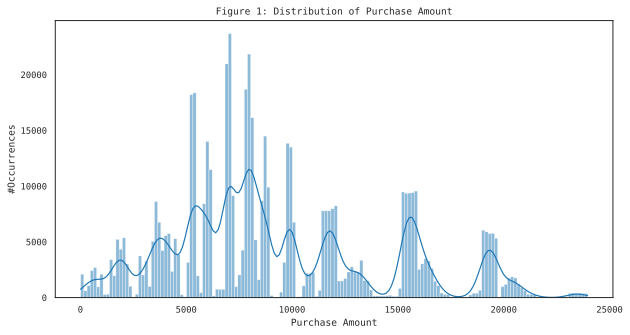

In [12]:
fig_num += 1
plot_histogram(df['purchase'], 'Purchase Amount', fig_num)

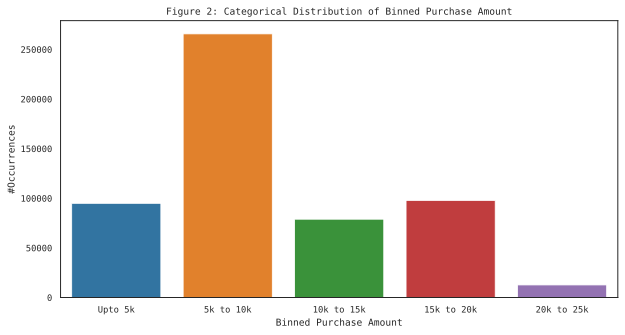

In [13]:
fig_num += 1
plot_countplot(pd.cut(x = df['purchase'], bins = [0, 5000, 10000, 15000, 20000, 25000], labels = ['Upto 5k', '5k to 10k', '10k to 15k', '15k to 20k', '20k to 25k'], include_lowest = True), 'Binned Purchase Amount', fig_num)

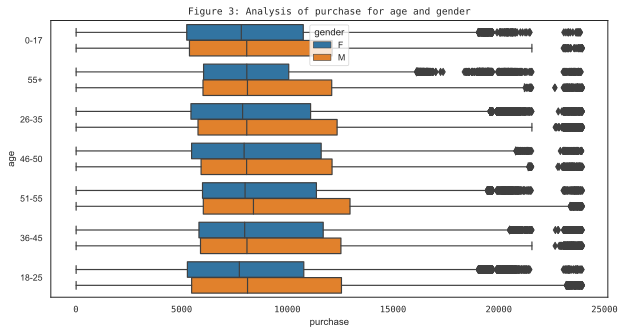

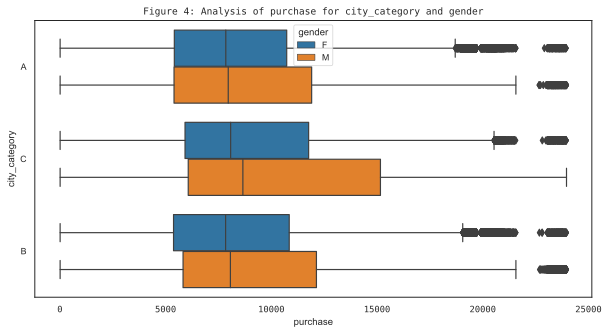

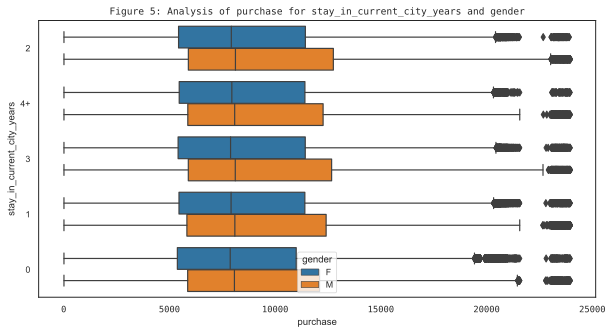

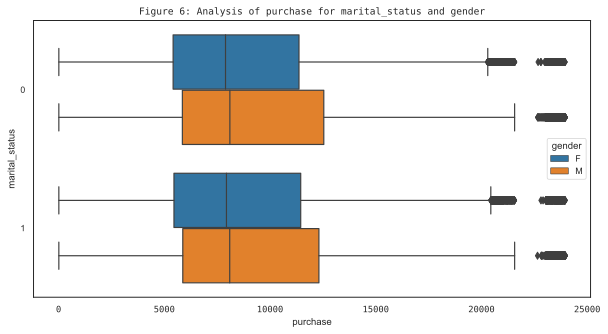

In [14]:
for col in ['age', 'city_category', 'stay_in_current_city_years', 'marital_status']:
    fig_num += 1
    plot_boxplot(df, 'purchase', col, fig_num, 'gender')

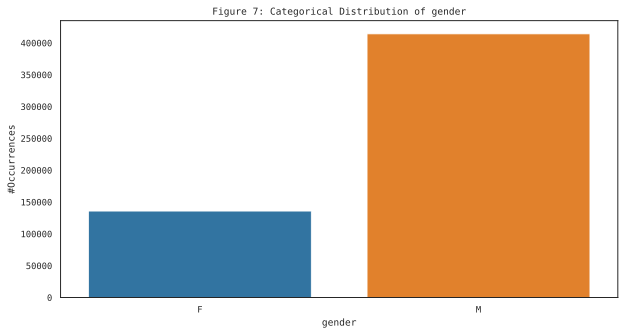

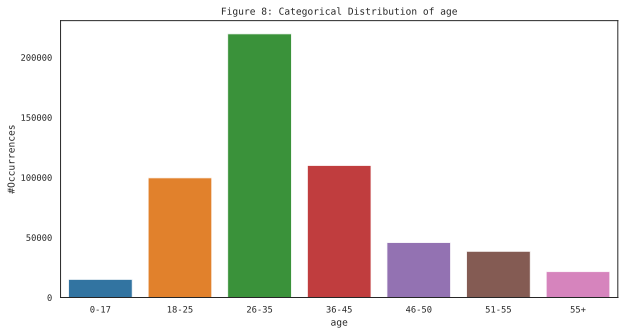

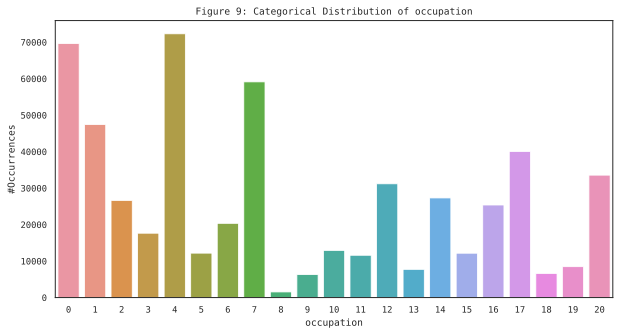

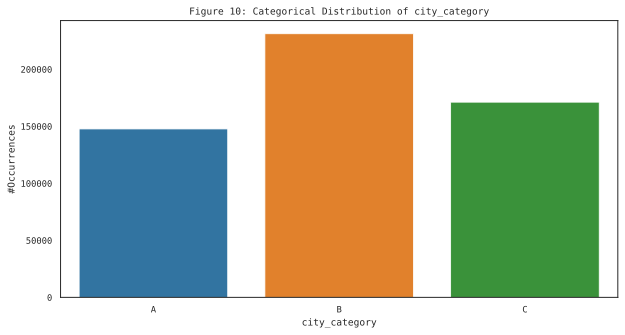

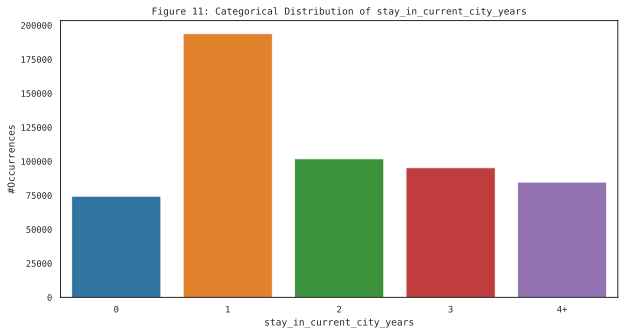

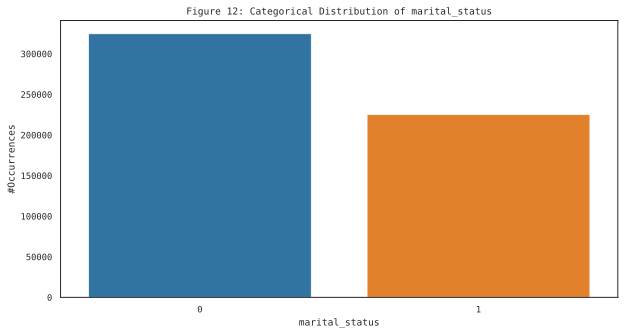

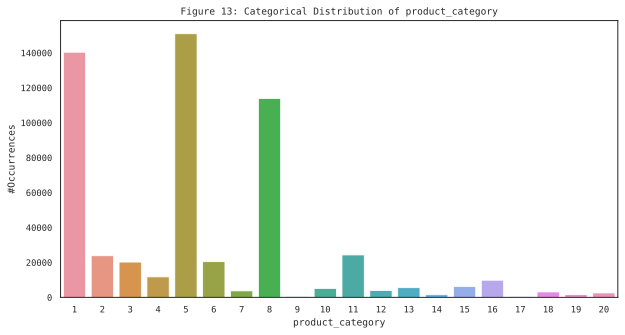

In [15]:
for col in object_col_list:
    fig_num += 1
    plot_countplot(sorted(df[col]), col, fig_num)

<span style="font-family: monospace">
<H1>Following cells answer Q2</H1>
</span>

In [16]:
# finding number of outliers base on iqr
purchase_column = df['purchase']
lower_bound = purchase_column.quantile(0.25)
upper_bound = purchase_column.quantile(0.75)
iqr = 1.5 * (upper_bound - lower_bound)
print('Total Number of outliers for Purchase Amount: ', purchase_column[(purchase_column < lower_bound - iqr) | (purchase_column > upper_bound + iqr)].shape[0])

# finding number of outliers base on iqr for males
purchase_column = df[df['gender'] == 'M']['purchase']
lower_bound = purchase_column.quantile(0.25)
upper_bound = purchase_column.quantile(0.75)
iqr = 1.5 * (upper_bound - lower_bound)
print('Total Number of outliers for Purchase Amount for Males: ', purchase_column[(purchase_column < lower_bound - iqr) | (purchase_column > upper_bound + iqr)].shape[0])

# finding number of outliers base on iqr for females
purchase_column = df[df['gender'] == 'F']['purchase']
lower_bound = purchase_column.quantile(0.25)
upper_bound = purchase_column.quantile(0.75)
iqr = 1.5 * (upper_bound - lower_bound)
print('Total Number of outliers for Purchase Amount for Females: ', purchase_column[(purchase_column < lower_bound - iqr) | (purchase_column > upper_bound + iqr)].shape[0])

Total Number of outliers for Purchase Amount:  2677
Total Number of outliers for Purchase Amount for Males:  1812
Total Number of outliers for Purchase Amount for Females:  2065


In [17]:
# number of missing values in rhe dataset
print(df.isna().sum())

user_id                       0
product_id                    0
gender                        0
age                           0
occupation                    0
city_category                 0
stay_in_current_city_years    0
marital_status                0
product_category              0
purchase                      0
dtype: int64


<span style="font-family: monospace">
<H1>Answer to Q3</H1>

From Figure 1:

Inference 1: The purchase amount is not normally distributed and separate groups can be observed in the dataset.


<br>
From Figure 2:

Inference 2: Items in the price range of 5k and 10k are most bought.

Inference 3: Items in the price range of above 20k is least bought.


<br>
From Figure 3:

Inference 4: Median purchase remains the comparable across different categories of age.

Inference 5: Maximum purchase, excluding outliers, differs significantly between males and females across different categories of age.


<br>
From Figure 4:

Inference 6: Median purchase remains the comparable across different categories of city_category.

Inference 7: Maximum purchase, excluding outliers, differs significantly between males and females across different categories of city_category.


<br>
From Figure 5:

Inference 8: Median purchase remains the comparable across different categories of stay_in_current_city_years.

Inference 9: Maximum purchase, excluding outliers, differs significantly between males and females across different categories of stay_in_current_city_years.


<br>
From Figure 6:

Inference 10: Median purchase remains the comparable across different categories of marital_status.

Inference 11: Maximum purchase, excluding outliers, differs significantly between males and females across different categories of marital_status.


<br>
From Figure 7:

Inference 12: Walmart receives three time the male customer than female customers.


<br>
From Figure 8:

Inference 13: Maximum number of customers are in 26-35 age group.

Inference 14: Age groups 18-25 and 36-47 has second maximum number of customers.


<br>
From Figure 9:

Inference 15: Most customers are employed in occupation - 1, 4, and 7.


<br>
From Figure 10:

Inference 16: Customers are evenly distributed in city category A and C with little more customers in B.


<br>
From Figure 11:

Inference 17: Most customers have completed a year in their city of resident.


<br>
From Figure 12:

Inference 18: Slightly more unmarried customers than married customers.


<br>
From Figure 13:

Inference 19: Product category 1, 5, and 8 are more common among customers.

</span>

<span style="font-family: monospace">
<H1>Following cells answer Q4</H1>
</span>

Number of males in dataset: 414259
Number of females in dataset: 135809

Mean of purchase amount for males: 9437.53
Standard Deviation of purchase amount for males: 5092.19

Mean of purchase amount for females: 8734.57
Standard Deviation of purchase amount for females: 4767.23



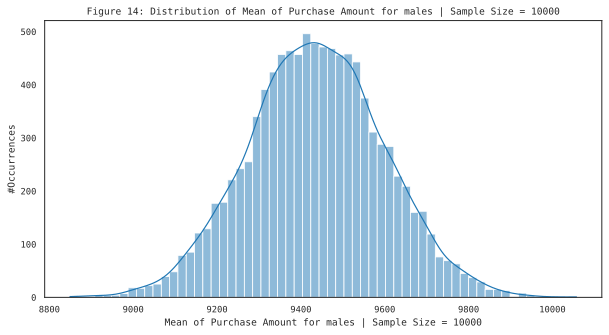

Mean value for n = 10000 is 9436.3723877
With 95.0% confidence, mean lies between 9336.567297675649 and 9536.17747772435
With 90.0% confidence, mean lies between 9352.613315793738 and 9520.13145960626
With 50.0% confidence, mean lies between 9402.02608808949 and 9470.71868731051



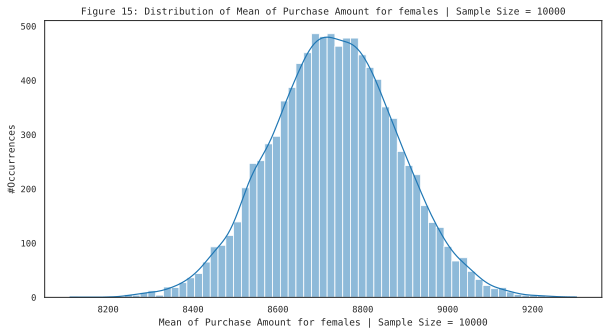

Mean value for n = 10000 is 8732.390820400002
With 95.0% confidence, mean lies between 8638.954829339813 and 8825.82681146019
With 90.0% confidence, mean lies between 8653.976864839882 and 8810.80477596012
With 50.0% confidence, mean lies between 8700.236342681728 and 8764.545298118275



In [18]:
male_purchase_amount = df[df['gender'] == 'M']['purchase']
female_purchase_amount = df[df['gender'] == 'F']['purchase']

print(f'Number of males in dataset: {male_purchase_amount.shape[0]}')
print(f'Number of females in dataset: {female_purchase_amount.shape[0]}')
print()

male_population_mean = round(male_purchase_amount.mean(), 2)
male_population_standarad_deviation = round(male_purchase_amount.std(), 2)
print(f'Mean of purchase amount for males: {male_population_mean}')
print(f'Standard Deviation of purchase amount for males: {male_population_standarad_deviation}')
print()

female_population_mean = round(female_purchase_amount.mean(), 2)
female_population_standarad_deviation = round(female_purchase_amount.std(), 2)
print(f'Mean of purchase amount for females: {female_population_mean}')
print(f'Standard Deviation of purchase amount for females: {female_population_standarad_deviation}')
print()

# for n in [100, 500, 1000, 10000]:
for n in [10000]:
    fig_num += 1
    temp = [male_purchase_amount.sample(n=1000).mean() for i in range(n)]
    sample_mean = np.mean(temp)

    plot_histogram(temp, f'Mean of Purchase Amount for males | Sample Size = {n}', fig_num)

    print(f'Mean value for n = {n} is {sample_mean}')

    for ci in [0.05/2, 0.1/2, 0.5/2]:

        lower_bound = sample_mean + (norm.ppf(0 + ci) * male_population_standarad_deviation/ np.sqrt(n))
        upper_bound = sample_mean + (norm.ppf(1 - ci) * male_population_standarad_deviation/ np.sqrt(n))

        print(f'With {(1 - (ci * 2)) * 100}% confidence, mean lies between {lower_bound} and {upper_bound}')
print()

# for n in [100, 500, 1000, 10000]:
for n in [10000]:
    fig_num += 1
    temp = [female_purchase_amount.sample(n=1000).mean() for i in range(n)]
    sample_mean = np.mean(temp)

    plot_histogram(temp, f'Mean of Purchase Amount for females | Sample Size = {n}', fig_num)

    print(f'Mean value for n = {n} is {sample_mean}')

    for ci in [0.05/2, 0.1/2, 0.5/2]:

        lower_bound = sample_mean + (norm.ppf(0 + ci) * female_population_standarad_deviation/ np.sqrt(n))
        upper_bound = sample_mean + (norm.ppf(1 - ci) * female_population_standarad_deviation/ np.sqrt(n))

        print(f'With {(1 - (ci * 2)) * 100}% confidence, mean lies between {lower_bound} and {upper_bound}')
print()

Number of married in dataset: 225337
Number of unmarried in dataset: 324731

Mean of purchase amount for married: 9261.17
Standard Deviation of purchase amount for married: 5016.9

Mean of purchase amount for unmarried: 9265.91
Standard Deviation of purchase amount for unmarried: 5027.35



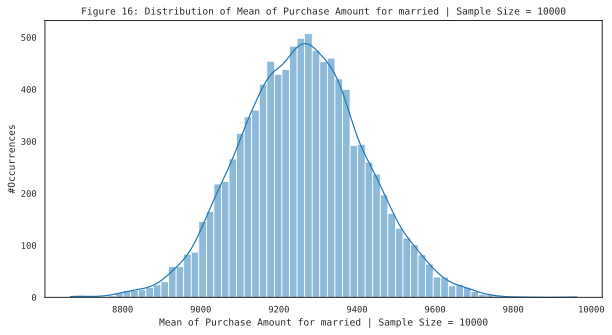

Mean value for n = 10000 is 9259.056775
With 95.0% confidence, mean lies between 9160.727341859609 and 9357.38620814039
With 90.0% confidence, mean lies between 9176.536113389471 and 9341.577436610527
With 50.0% confidence, mean lies between 9225.218298722411 and 9292.895251277587



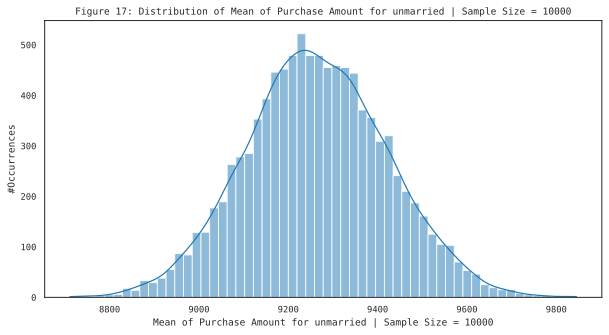

Mean value for n = 10000 is 9263.6781612
With 95.0% confidence, mean lies between 9165.143911823225 and 9362.212410576774
With 90.0% confidence, mean lies between 9180.985612385455 and 9346.370710014544
With 50.0% confidence, mean lies between 9229.769200743516 and 9297.587121656483



In [19]:
# assumption - married = 1 and unmarried = 0

married_purchase_amount = df[df['marital_status'] == 1]['purchase']
unmarried_purchase_amount = df[df['marital_status'] == 0]['purchase']

print(f'Number of married in dataset: {married_purchase_amount.shape[0]}')
print(f'Number of unmarried in dataset: {unmarried_purchase_amount.shape[0]}')
print()

married_population_mean = round(married_purchase_amount.mean(), 2)
married_population_standarad_deviation = round(married_purchase_amount.std(), 2)
print(f'Mean of purchase amount for married: {married_population_mean}')
print(f'Standard Deviation of purchase amount for married: {married_population_standarad_deviation}')
print()

unmarried_population_mean = round(unmarried_purchase_amount.mean(), 2)
unmarried_population_standarad_deviation = round(unmarried_purchase_amount.std(), 2)
print(f'Mean of purchase amount for unmarried: {unmarried_population_mean}')
print(f'Standard Deviation of purchase amount for unmarried: {unmarried_population_standarad_deviation}')
print()

# for n in [100, 500, 1000, 10000]:
for n in [10000]:
    fig_num += 1
    temp = [married_purchase_amount.sample(n=1000).mean() for i in range(n)]
    sample_mean = np.mean(temp)

    plot_histogram(temp, f'Mean of Purchase Amount for married | Sample Size = {n}', fig_num)

    print(f'Mean value for n = {n} is {sample_mean}')

    for ci in [0.05/2, 0.1/2, 0.5/2]:

        lower_bound = sample_mean + (norm.ppf(0 + ci) * married_population_standarad_deviation/ np.sqrt(n))
        upper_bound = sample_mean + (norm.ppf(1 - ci) * married_population_standarad_deviation/ np.sqrt(n))

        print(f'With {(1 - (ci * 2)) * 100}% confidence, mean lies between {lower_bound} and {upper_bound}')
print()

# for n in [100, 500, 1000, 10000]:
for n in [10000]:
    fig_num += 1
    temp = [unmarried_purchase_amount.sample(n=1000).mean() for i in range(n)]
    sample_mean = np.mean(temp)

    plot_histogram(temp, f'Mean of Purchase Amount for unmarried | Sample Size = {n}', fig_num)

    print(f'Mean value for n = {n} is {sample_mean}')

    for ci in [0.05/2, 0.1/2, 0.5/2]:

        lower_bound = sample_mean + (norm.ppf(0 + ci) * unmarried_population_standarad_deviation/ np.sqrt(n))
        upper_bound = sample_mean + (norm.ppf(1 - ci) * unmarried_population_standarad_deviation/ np.sqrt(n))

        print(f'With {(1 - (ci * 2)) * 100}% confidence, mean lies between {lower_bound} and {upper_bound}')
print()

Number of people in 0-17 in dataset: 15102

Mean of purchase amount for 0-17: 8933.46
Standard Deviation of purchase amount for 0-17: 5111.11



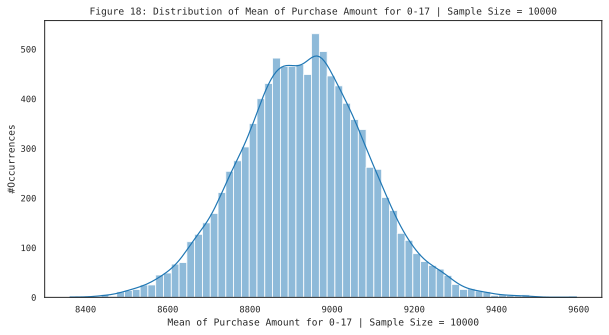

Mean value for n = 10000 is 8930.2528081
With 95.0% confidence, mean lies between 8830.076892889774 and 9030.428723310226
With 90.0% confidence, mean lies between 8846.182529887521 and 9014.323086312479
With 50.0% confidence, mean lies between 8895.778895028752 and 8964.726721171248
----------------------------------------------------------------------------------------------------
Number of people in 18-25 in dataset: 99660

Mean of purchase amount for 18-25: 9169.66
Standard Deviation of purchase amount for 18-25: 5034.32



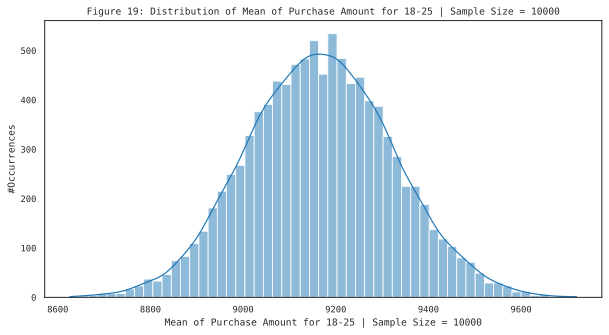

Mean value for n = 10000 is 9166.4367766
With 95.0% confidence, mean lies between 9067.765917733503 and 9265.107635466497
With 90.0% confidence, mean lies between 9083.629581487656 and 9249.243971712343
With 50.0% confidence, mean lies between 9132.480804207928 and 9200.392748992072
----------------------------------------------------------------------------------------------------
Number of people in 26-35 in dataset: 219587

Mean of purchase amount for 26-35: 9252.69
Standard Deviation of purchase amount for 26-35: 5010.53



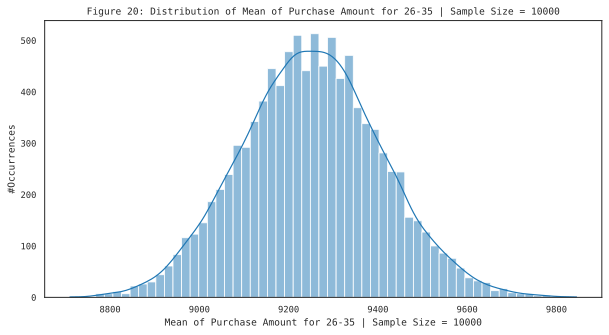

Mean value for n = 10000 is 9252.2201196
With 95.0% confidence, mean lies between 9154.015536165425 and 9350.424703034576
With 90.0% confidence, mean lies between 9169.80423516551 and 9334.636004034492
With 50.0% confidence, mean lies between 9218.424608319501 and 9286.0156308805
----------------------------------------------------------------------------------------------------
Number of people in 36-45 in dataset: 110013

Mean of purchase amount for 36-45: 9331.35
Standard Deviation of purchase amount for 36-45: 5022.92



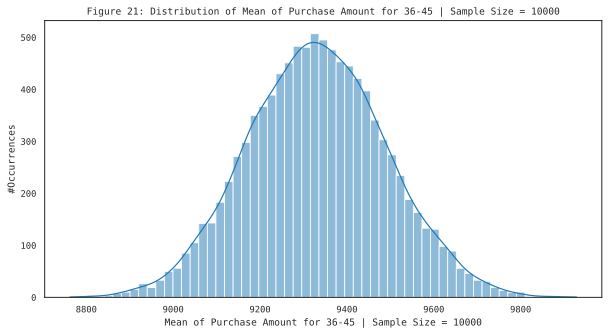

Mean value for n = 10000 is 9331.364782200002
With 95.0% confidence, mean lies between 9232.917359227742 and 9429.812205172262
With 90.0% confidence, mean lies between 9248.745100401131 and 9413.984463998873
With 50.0% confidence, mean lies between 9297.485701639453 and 9365.243862760552
----------------------------------------------------------------------------------------------------
Number of people in 46-50 in dataset: 45701

Mean of purchase amount for 46-50: 9208.63
Standard Deviation of purchase amount for 46-50: 4967.22



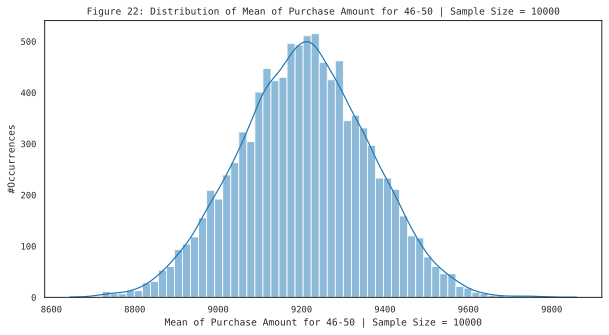

Mean value for n = 10000 is 9205.7916886
With 95.0% confidence, mean lies between 9108.43596556713 and 9303.14741163287
With 90.0% confidence, mean lies between 9124.08819027134 and 9287.49518692866
With 50.0% confidence, mean lies between 9172.28829883031 and 9239.29507836969
----------------------------------------------------------------------------------------------------
Number of people in 51-55 in dataset: 38501

Mean of purchase amount for 51-55: 9534.81
Standard Deviation of purchase amount for 51-55: 5087.37



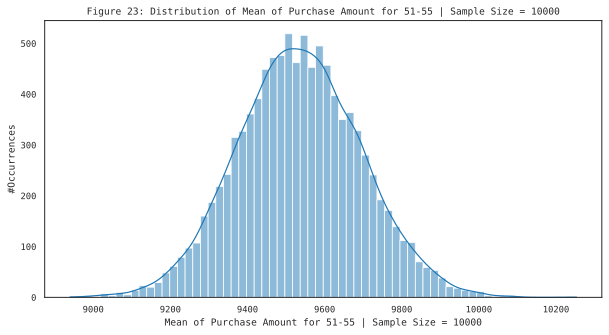

Mean value for n = 10000 is 9534.267778099998
With 95.0% confidence, mean lies between 9434.557158339703 and 9633.978397860294
With 90.0% confidence, mean lies between 9450.587988138557 and 9617.94756806144
With 50.0% confidence, mean lies between 9499.953988895448 and 9568.581567304549
----------------------------------------------------------------------------------------------------
Number of people in 55+ in dataset: 21504

Mean of purchase amount for 55+: 9336.28
Standard Deviation of purchase amount for 55+: 5011.49



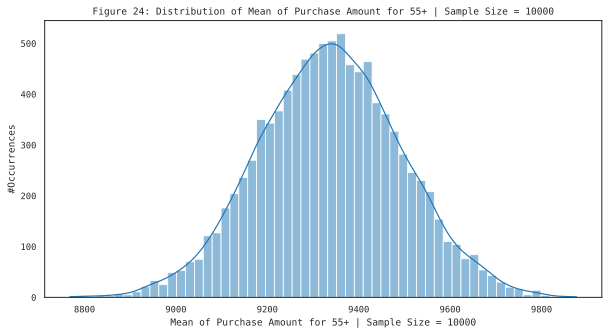

Mean value for n = 10000 is 9337.8053095
With 95.0% confidence, mean lies between 9239.581910411172 and 9436.028708588827
With 90.0% confidence, mean lies between 9255.373634470689 and 9420.23698452931
With 50.0% confidence, mean lies between 9304.003323117899 and 9371.6072958821
----------------------------------------------------------------------------------------------------


In [20]:
for age_group in sorted(df['age'].unique()):

    age_group_purchase_amount = df[df['age'] == age_group]['purchase']

    print(f'Number of people in {age_group} in dataset: {age_group_purchase_amount.shape[0]}')
    print()

    age_group_mean = round(age_group_purchase_amount.mean(), 2)
    age_group_standarad_deviation = round(age_group_purchase_amount.std(), 2)
    print(f'Mean of purchase amount for {age_group}: {age_group_mean}')
    print(f'Standard Deviation of purchase amount for {age_group}: {age_group_standarad_deviation}')
    print()

    for n in [10000]:
        fig_num += 1
        temp = [age_group_purchase_amount.sample(n=1000).mean() for i in range(n)]
        sample_mean = np.mean(temp)

        plot_histogram(temp, f'Mean of Purchase Amount for {age_group} | Sample Size = {n}', fig_num)

        print(f'Mean value for n = {n} is {sample_mean}')

        for ci in [0.05/2, 0.1/2, 0.5/2]:

            lower_bound = sample_mean + (norm.ppf(0 + ci) * age_group_standarad_deviation/ np.sqrt(n))
            upper_bound = sample_mean + (norm.ppf(1 - ci) * age_group_standarad_deviation/ np.sqrt(n))

            print(f'With {(1 - (ci * 2)) * 100}% confidence, mean lies between {lower_bound} and {upper_bound}')
    print('-'*100)

<span style="font-family: monospace">

<H1>Answer to Q5</H1>

<H3>Analysis of Confidence Intervals basis gender</H3>

From Figure 14 and 15 and subsequent confidence intervals, 

1. No overlap in confidence intervals for males and females.
2. No, Females do not spend more than males.
3. Promote and provide incentive to males and females to buy expensive products to increase the purchase range.


<H3>Analysis of Confidence Intervals basis marital_status</H3>

From Figure 16 and 17 and subsequent confidence intervals, 

1. Overlap in the confidence intervals for married and unmarried customers that makes it difficult to segregate customers basis their marital_status.
2. Walamrt should not target customers based on their marital status.


<H3>Analysis of Confidence Intervals basis age</H3>

From Figure 18 and 24 and subsequent confidence intervals, 

1. Except for age group 0-17 and 51-55, all other have overlapping confidence intervals.
2. Customers in age group 0-17 tend to purchase cheap products.
3. Customers in age group 51-55 tend to purchase expensive products.

</span>

<span style="font-family: monospace">

<H1>Answer to Q6</H1>

<H3>Recommendations:</H3>

1. Based on Figure 2: To ramp-up the sale of expensive products, offer targeted discounts.
2. Based on Figure 7: To build more female customers, increase the offering of related products and discount.
3. Based on Figure 9: Advertize and offer discount for customers in less popular occupation.
4. Based on Figure 11: Introduce more products that can be useful to people who recently moved into the city or have been living for more than 2 years.
5. Based on Figure 13: Advertize and offer discount on products from less popular categories.

</span>